# Nettoyage des datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Visualisation des datasets

In [3]:
# Load datasets
df1 = pd.read_csv("datasets/full_grouped.csv")
df2 = pd.read_csv("datasets/worldometer_coronavirus_daily_data.csv")
df3 = pd.read_csv("datasets/owid-monkeypox-data.csv")

# Columns preview
print(df1.columns)
print('-------------------')
print(df2.columns)
print('-------------------')
print(df3.columns)

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')
-------------------
Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')
-------------------
Index(['location', 'iso_code', 'date', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')


On va conserver la date, le pays, le nb total de cas, de morts, et les cas et morts du jour car ils sont communs aux trois datasets.

Le nombre de cas actifs n'est pas présent dans le dataset mpox donc on ne gardera pas cette colonne. D'ailleurs, il est assez difficile de s'assurer que le nombre de cas actifs est précis car il est difficile pour une personne atteinte de savoir précisément quel jour elle a guéri puisque ça se fait au fil du temps.

La région est présente dans un seul des trois datasets donc on ne la gardera pas. De plus, on peut la retrouver à partir du pays s'il y a besoin plus tard.

On va aussi rajouter une colonne virus pour savoir quelle pandémie est concernée

On renomme les noms des colonnes de chaque datasets pour qu'ils soient uniformes

In [4]:
columns = ["date", "country", "total_cases",
            "total_deaths", "new_cases", "new_deaths"]

# Rename columns
df1 = df1.rename(columns={
    "Date": "date", "Country/Region": "country", "Confirmed": "total_cases",
    "Deaths": "total_deaths", "New cases": "new_cases", "New deaths": "new_deaths"
})[columns]

df2 = df2.rename(columns={
    "date": "date", "country": "country", "cumulative_total_cases": "total_cases",
    "daily_new_cases": "new_cases", "cumulative_total_deaths": "total_deaths", "daily_new_deaths": "new_deaths"
})[columns]

df3 = df3.rename(columns={
    "date": "date", "location": "country", "total_cases": "total_cases",
    "new_cases": "new_cases", "total_deaths": "total_deaths", "new_deaths": "new_deaths"
})[columns]

# Add 'virus' column
df1['virus'] = 'covid'
df2['virus'] = 'covid'
df3['virus'] = 'monkeypox'

Ensuite describe et head pour voir le type des données

In [34]:
print(df1.dtypes)
print(f"Nombre de lignes dans df1: {len(df1)}")
print('-------------------')
print(df2.dtypes)
print(f"Nombre de lignes dans df1: {len(df2)}")
print('-------------------')
print(df3.dtypes)
print(f"Nombre de lignes dans df1: {len(df3)}")

date                     datetime64[ns]
country                          object
total_cases                       int64
total_deaths                      int64
new_cases                         int64
new_deaths                        int64
virus                            object
computed_total_cases              int64
computed_total_deaths             int64
dtype: object
Nombre de lignes dans df1: 35156
-------------------
date                     datetime64[ns]
country                          object
total_cases                       int64
total_deaths                      int64
new_cases                         int64
new_deaths                        int64
virus                            object
computed_total_cases              int64
computed_total_deaths             int64
dtype: object
Nombre de lignes dans df1: 184787
-------------------
date                     datetime64[ns]
country                          object
total_cases                       int64
total_deaths             

## Valeurs manquantes

In [6]:
# Afficher les lignes contenant des valeurs manquantes
for i, df in enumerate([df1, df2, df3], start=1):
    missing_data = df[df.isnull().any(axis=1)]
    if not missing_data.empty:
        print(f"Lignes avec des valeurs manquantes dans le DataFrame df{i}:")
        print(missing_data)
    else:
        print(f"Aucune valeur manquante trouvée dans le DataFrame df{i}.")

Aucune valeur manquante trouvée dans le DataFrame df1.
Lignes avec des valeurs manquantes dans le DataFrame df2:
             date      country  total_cases  total_deaths  new_cases  \
0       2020-2-15  Afghanistan          0.0           0.0        NaN   
1       2020-2-16  Afghanistan          0.0           0.0        NaN   
2       2020-2-17  Afghanistan          0.0           0.0        NaN   
3       2020-2-18  Afghanistan          0.0           0.0        NaN   
4       2020-2-19  Afghanistan          0.0           0.0        NaN   
...           ...          ...          ...           ...        ...   
184000  2020-3-19     Zimbabwe          0.0           0.0        NaN   
184001  2020-3-20     Zimbabwe          1.0           0.0        NaN   
184002  2020-3-21     Zimbabwe          3.0           0.0        2.0   
184003  2020-3-22     Zimbabwe          3.0           0.0        0.0   
184004  2020-3-23     Zimbabwe          3.0           1.0        0.0   

        new_deaths  vi

In [7]:
# Corriger les valeurs manquantes dans les colonnes 'new_cases', 'new_deaths', 'total_cases' et 'total_deaths' en les remplaçant par 0. 
for df in [df1, df2, df3]:
    df['new_cases'] = df['new_cases'].fillna(0)
    df['new_deaths'] = df['new_deaths'].fillna(0)
    df['total_cases'] = df['total_cases'].fillna(0)
    df['total_deaths'] = df['total_deaths'].fillna(0)

## Formatage des données

In [8]:
# Format date and virus columns, and convert float columns to int
for df in [df1, df2, df3]:
    # Convert date to datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Ensure virus column is a string
    df['virus'] = df['virus'].astype(str)

    # Ensure country column is a string
    df['country'] = df['country'].astype(str)
    
    # Convert float columns to int
    float_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
    for col in float_columns:
        df[col] = df[col].astype(int)

# Print the data types of each column in the dataframes
print(df1.dtypes)
print('-------------------')
print(df2.dtypes)
print('-------------------')
print(df3.dtypes)

date            datetime64[ns]
country                 object
total_cases              int64
total_deaths             int64
new_cases                int64
new_deaths               int64
virus                   object
dtype: object
-------------------
date            datetime64[ns]
country                 object
total_cases              int64
total_deaths             int64
new_cases                int64
new_deaths               int64
virus                   object
dtype: object
-------------------
date            datetime64[ns]
country                 object
total_cases              int64
total_deaths             int64
new_cases                int64
new_deaths               int64
virus                   object
dtype: object


## Vérifier les colonnes total

In [9]:
# Trier les données pour chaque pays dans l'ordre chronologique
for df in [df1, df2, df3]:
    df.sort_values(by=["country", "date"], inplace=True)

# Vérifier les incohérences
for i, df in enumerate([df1, df2, df3], start=1):
    df["computed_total_cases"] = df.groupby("country")["new_cases"].cumsum()
    df["computed_total_deaths"] = df.groupby("country")["new_deaths"].cumsum()

    # Trouver les lignes où les valeurs cumulées ne correspondent pas aux valeurs déclarées
    inconsistent_cases = df[df["total_cases"] < df["computed_total_cases"]]
    inconsistent_deaths = df[df["total_deaths"] < df["computed_total_deaths"]]

    print(f"Nombre d'incohérences dans le DataFrame df{i}:")
    print(f"  - Cas: {len(inconsistent_cases)} incohérences")
    print(f"  - Décès: {len(inconsistent_deaths)} incohérences")


Nombre d'incohérences dans le DataFrame df1:
  - Cas: 1520 incohérences
  - Décès: 0 incohérences
Nombre d'incohérences dans le DataFrame df2:
  - Cas: 0 incohérences
  - Décès: 0 incohérences
Nombre d'incohérences dans le DataFrame df3:
  - Cas: 0 incohérences
  - Décès: 0 incohérences


## Visualisons les incohérences pour comprendre la nature des erreurs

In [35]:
for i, df in enumerate([df1, df2, df3], start=1): 
    df["computed_total_cases"] = df.groupby("country")["new_cases"].cumsum()
    df["computed_total_deaths"] = df.groupby("country")["new_deaths"].cumsum()

    # Trouver les lignes où les valeurs cumulées ne correspondent pas aux valeurs déclarées
    inconsistent_cases = df[df["total_cases"] < df["computed_total_cases"]]
    inconsistent_deaths = df[df["total_deaths"] < df["computed_total_deaths"]]
       
    # Afficher les lignes avec des incohérences
    if not inconsistent_cases.empty:
        print(f"Lignes avec incohérences de cas dans le DataFrame df{i}:")
        print(inconsistent_cases[['date', 'country', 'total_cases', 'computed_total_cases']])
    if not inconsistent_deaths.empty:
        print(f"Lignes avec incohérences de décès dans le DataFrame df{i}:")
        print(inconsistent_deaths[['date', 'country', 'total_deaths', 'computed_total_deaths']])

Lignes avec incohérences de cas dans le DataFrame df1:
            date              country  total_cases  computed_total_cases
30486 2020-07-03  Antigua and Barbuda           68                    69
30673 2020-07-04  Antigua and Barbuda           68                    69
30860 2020-07-05  Antigua and Barbuda           68                    69
31047 2020-07-06  Antigua and Barbuda           70                    71
31234 2020-07-07  Antigua and Barbuda           70                    71
...          ...                  ...          ...                   ...
34407 2020-07-23             Zimbabwe         2124                  2130
34594 2020-07-24             Zimbabwe         2296                  2302
34781 2020-07-25             Zimbabwe         2434                  2440
34968 2020-07-26             Zimbabwe         2512                  2518
35155 2020-07-27             Zimbabwe         2704                  2710

[1520 rows x 4 columns]


On voit qu'on a des incohérences de calcul dans le total de cas pour le premier dataset. Cela peut etre causé soit par des corrections officielles, soit des erreurs informatiques, soit une erreur humaine à l'entrée des données.
Solutions :
- Prendre les données de l'autre dataset et écraser celles-ci.
- Faire la moyenne avec l'autre dataset
- Recalculer manuellement

Attention : On remarque quelque chose de très particulier : Les IDs de beaucoup de lignes concernées sont toujours espacées d'une raison d'exactement 187.

On va donc d'abord vérifier que le problème est bien présent de la même manière partout. Ensuite, on décidera d'une solution

In [36]:
# Détection des incohérences
inconsistent_cases = df1[df1["total_cases"] != df1["computed_total_cases"]].copy()

# Extraction des index des incohérences
incoherent_indices = inconsistent_cases.index.to_numpy()

# Vérification de la régularité des indices
diffs = incoherent_indices[1:] - incoherent_indices[:-1]  # Calcul des écarts successifs

# Affichage des résultats
print("🔍 Analyse des écarts entre les indices des incohérences :")
print(diffs[:20])  # Afficher les 20 premiers écarts pour voir la tendance

# Vérifier si la suite est parfaitement régulière
if len(set(diffs)) == 1:
    print(f"\n✅ Tous les écarts sont constants : {diffs[0]}")
else:
    print("\n⚠️ Les écarts ne sont pas parfaitement constants.")
    print(f"Valeurs uniques d'écarts trouvées : {set(diffs)}")
    
# Identifier les pays concernés par les incohérences
pays_incoherents = inconsistent_cases['country'].unique()

# Afficher les pays concernés
print("\n🌍 Pays concernés par les incohérences :")
print(pays_incoherents)

🔍 Analyse des écarts entre les indices des incohérences :
[187 187 187 187 187 187 187 187 187 187 187 187 187 187 187 187 187 187
 187 187]

⚠️ Les écarts ne sont pas parfaitement constants.
Valeurs uniques d'écarts trouvées : {np.int64(2), np.int64(-16636), np.int64(-14578), np.int64(-19818), np.int64(-1121), np.int64(-12890), np.int64(-16074), np.int64(-16070), np.int64(187), np.int64(-23363), np.int64(-14397), np.int64(-2235), np.int64(-7097), np.int64(-17202), np.int64(-16817), np.int64(-17576), np.int64(-17951), np.int64(-15132), np.int64(-34967), np.int64(-34966), np.int64(-34963), np.int64(-34962), np.int64(-34957), np.int64(-18699), np.int64(-34951), np.int64(-13829), np.int64(-14209)}

🌍 Pays concernés par les incohérences :
['Antigua and Barbuda' 'Benin' 'China' 'Ecuador' 'Finland' 'France'
 'Guyana' 'Honduras' 'Italy' 'Japan' 'Jordan' 'Lithuania' 'Madagascar'
 'Mauritius' 'Nepal' 'New Zealand' 'Niger' 'Portugal' 'San Marino'
 'South Korea' 'Spain' 'Taiwan*' 'Thailand' 'US' 


🔹 Top 10 des pays avec le plus d'incohérences :
country
China          188
Japan          188
US             188
South Korea    188
Taiwan*        188
Thailand       188
Guyana         126
Uruguay        107
Uganda         101
France          97
Name: count, dtype: int64

🔹 Top 10 des dates avec le plus d'incohérences :
date
2020-01-22    6
2020-01-23    6
2020-01-24    6
2020-01-25    6
2020-01-26    6
2020-01-27    6
2020-01-28    6
2020-01-29    6
2020-01-30    6
2020-01-31    6
Name: count, dtype: int64


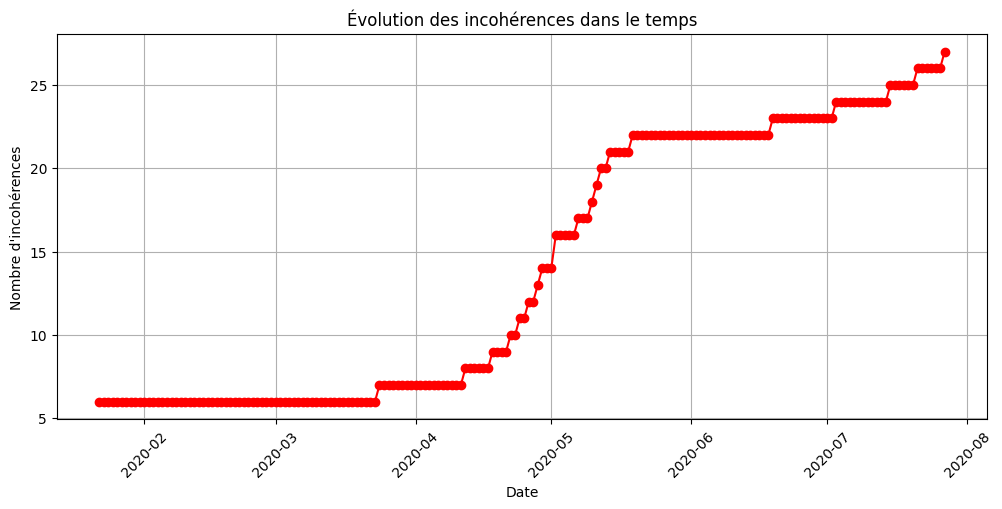

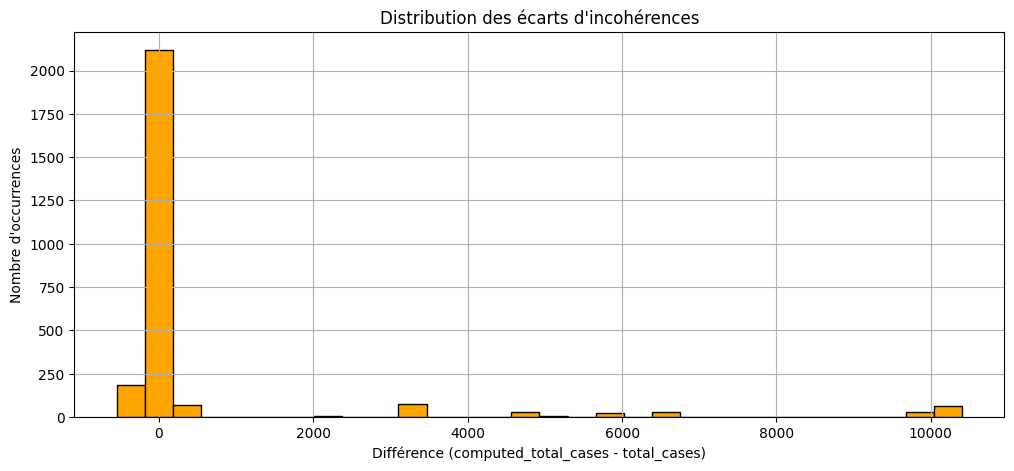

In [37]:
# Détection des incohérences
inconsistent_cases = df1[df1["total_cases"] != df1["computed_total_cases"]].copy()

# Calcul de l'écart entre total_cases et computed_total_cases
inconsistent_cases["cases_diff"] = inconsistent_cases["computed_total_cases"] - inconsistent_cases["total_cases"]

# Nombre d'incohérences par pays
country_counts = inconsistent_cases["country"].value_counts()

# Affichage des 10 pays les plus touchés
print("\n🔹 Top 10 des pays avec le plus d'incohérences :")
print(country_counts.head(10))

# Distribution des erreurs par date
date_counts = inconsistent_cases["date"].value_counts().sort_index()

# Affichage des 10 dates les plus touchées
print("\n🔹 Top 10 des dates avec le plus d'incohérences :")
print(date_counts.head(10))

# Visualisation des erreurs sur le temps
plt.figure(figsize=(12, 5))
plt.plot(date_counts.index, date_counts.values, marker="o", linestyle="-", color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Nombre d'incohérences")
plt.title("Évolution des incohérences dans le temps")
plt.grid(True)
plt.show()

# Visualisation des écarts d'erreurs
plt.figure(figsize=(12, 5))
plt.hist(inconsistent_cases["cases_diff"], bins=30, color="orange", edgecolor="black")
plt.xlabel("Différence (computed_total_cases - total_cases)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des écarts d'incohérences")
plt.grid(True)
plt.show()


Le top 10 des pays les plus touchés nous montre que 6 pays ont exactement le même nombre d'erreurs, ce qui suggère que les statistiques de ces pays ont été rapportés par la même source

Le premier graphique nous montre que les erreurs apparaissent en majorité à la même période. C'est la période du pic du covid, donc c'est plutôt logique qu'il y ait des erreurs à cette période.

Le dernier graphique nous bien que la plupart des erreurs ont un intervalle régulier de raison 187. Cependant, il y a aussi d'autres lignes qui sont incohérentes mais n'ont pas le même intervalle. Regardons alors s'il s'agit aussi de petites erreurs de seulement 1 cas de différence ou s'il s'agit de gros écarts.

Comme les deux colonnes sont officielles (new_cases et total_cases), il est difficile de savoir à quelle colonne faire confiance. Lorsqu'on calcule le total des cas à partir des nouveaux cas quotidiens, il y a quelques incohérences qui surviennent. Pour savoir quelle colonne conserver, il faut savoir si l'incohérence de calcul n'est que sur une ligne pour total_cases et dans ce cas il faut la corriger, alors que si l'incohérence continue sur toutes les lignes cela signifie qu'il s'agit certainement d'un ajustement manuel et donc il faut le conserver. Vérifions cela.

In [38]:
temp_df1 = df1.copy()

# Détection des incohérences
temp_df1["inconsistency"] = temp_df1["total_cases"] != temp_df1["computed_total_cases"]

# Vérifier si l'incohérence continue sur les dates suivantes (par pays)
temp_df1["is_persistent_inconsistency"] = temp_df1.groupby("country")["inconsistency"].shift(-1).fillna(False)

# Marquer les incohérences isolées (si c'est une incohérence mais qu'elle ne continue pas)
temp_df1["is_isolated_inconsistency"] = temp_df1["inconsistency"] & ~temp_df1["is_persistent_inconsistency"]

# Supprimer les incohérences isolées qui ont pour date 2020-07-27
temp_df1 = temp_df1[~((temp_df1["is_isolated_inconsistency"]) & (temp_df1["date"] == "2020-07-27"))]

# Afficher uniquement les incohérences isolées
print(temp_df1[temp_df1["is_isolated_inconsistency"]])

Empty DataFrame
Columns: [date, country, total_cases, total_deaths, new_cases, new_deaths, virus, computed_total_cases, computed_total_deaths, inconsistency, is_persistent_inconsistency, is_isolated_inconsistency]
Index: []


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7464\1798180516.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df1["is_persistent_inconsistency"] = temp_df1.groupby("country")["inconsistency"].shift(-1).fillna(False)


Après avoir cherché à mettre en avant les incohérences isolées dans le dataset, on se rend compte qu'il n'y en a pas, le dataset a donc déjà dû être nettoyé.

On va maintenant vérifier si les datasets ont des lignes avec meme pays et meme date

In [43]:
# Vérifier les doublons de dates et de pays dans chaque dataset
for i, df in enumerate([df1, df2, df3], start=1):
    duplicate_rows = df[df.duplicated(subset=['date', 'country'], keep=False)]
    if duplicate_rows.empty:
        print(f"Aucune ligne avec le même pays et la même date trouvée dans le DataFrame df{i}.")
    else:
        print(f"Il y a des lignes avec le même pays et la même date dans le DataFrame df{i} :")
        print(duplicate_rows)

Aucune ligne avec le même pays et la même date trouvée dans le DataFrame df1.
Aucune ligne avec le même pays et la même date trouvée dans le DataFrame df2.
Aucune ligne avec le même pays et la même date trouvée dans le DataFrame df3.


Fusionner les datasets

In [39]:
# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the shape of the merged dataframe
print(merged_df.shape)

# Display the first few rows of the merged dataframe
print(merged_df.head())

(253609, 9)
        date      country  total_cases  total_deaths  new_cases  new_deaths  \
0 2020-01-22  Afghanistan            0             0          0           0   
1 2020-01-23  Afghanistan            0             0          0           0   
2 2020-01-24  Afghanistan            0             0          0           0   
3 2020-01-25  Afghanistan            0             0          0           0   
4 2020-01-26  Afghanistan            0             0          0           0   

   virus  computed_total_cases  computed_total_deaths  
0  covid                     0                      0  
1  covid                     0                      0  
2  covid                     0                      0  
3  covid                     0                      0  
4  covid                     0                      0  


Vérifions les noms des pays

In [40]:
# Display all unique country names
country_names = merged_df['country'].unique()
print(country_names)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

Le dataset semble déjà nettoyé. On note qu'il y a une étoile à côté du nom de Taiwan. Elle indique peut-être une différence de statut ou de reconnaissance internationale.

Traiement des doublons : df1 et df2 sont tous les deux sur le covid et donc après le merge, on aura deux lignes différentes pour certaines dates

In [41]:
merged_df = merged_df.drop_duplicates()

# Supposons que les colonnes du virus, de la date et du pays s'appellent 'virus', 'date' et 'pays' respectivement
covid_df = merged_df[merged_df['virus'] == 'covid']

# Vérifier les doublons de dates et de pays dans les lignes avec le virus "covid"
duplicate_dates_countries = covid_df[covid_df.duplicated(subset=['date', 'country'], keep=False)]

# Trier les doublons par date et pays
duplicate_dates_countries = duplicate_dates_countries.sort_values(by=['date', 'country'])

if duplicate_dates_countries.empty:
    print("Aucune ligne avec le virus 'covid' n'a la même date et le même pays qu'une autre ligne avec le virus 'covid'.")
else:
    print("Il y a des lignes avec le virus 'covid' ayant la même date et le même pays :")
    print(duplicate_dates_countries)

Il y a des lignes avec le virus 'covid' ayant la même date et le même pays :
             date   country  total_cases  total_deaths  new_cases  new_deaths  \
6768   2020-01-22     China          548            17          0           0   
69596  2020-01-22     China          571            17          0           0   
6769   2020-01-23     China          643            18         95           1   
69597  2020-01-23     China          830            25        259           8   
6770   2020-01-24     China          920            26        277           8   
...           ...       ...          ...           ...        ...         ...   
217646 2020-07-27     Yemen         1740           497         10           4   
34967  2020-07-27    Zambia         4552           140         71           1   
218466 2020-07-27    Zambia         4552           140         71           1   
35155  2020-07-27  Zimbabwe         2704            36        192           2   
219286 2020-07-27  Zimbabwe     

En regardant les deux datasets sur le covid on s'aperçoit que df1 est bien plus petit que df2, et énormément de lignes n'ont pas le même nombre de cas. Et si on décide de faire la moyenne des deux, on aura un problème car on ne pourra faire la moyenne que pour une petite partie de lignes puisque df2 est presque 6 fois plus gros. De plus, on a repéré des incohérences de calcul dans df1, donc on peut se demander si le dataset est vraiment correct... On ne va donc pas retenir ce dataset. On aurait pu faire la moyenne des deux datasets pour les lignes en commun entre les deux, sauf qu'il n'y a que 35000 lignes dans le plus petit des deux, et comme le problème métier de l'analyse est d'analyser les tendances d'une pandémie, il est largement préférable d'utiliser un dataset 6 fois plus grand pour couvrir une durée bien plus importante (quasiment deux ans). De plus, le dataset df2 semble déjà nettoyé car il n'y a pas d'incohérence dans les calculs, il n'y a pas de noms de pays similaires donc les données semblent normalisées, il n'y a pas de doublons dans les dates non plus.

In [44]:
# Dataset final
df = pd.concat([df2, df3], ignore_index=True)

In [46]:
# Fichier CSV final
df.to_csv("datasets/final_dataset.csv", index=False)